In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import wavfile

In [2]:
fs, maskoff_tone = wavfile.read("../audio/maskoff_tone.wav")
fs, maskon_tone = wavfile.read("../audio/maskon_tone.wav")

In [3]:
# conversion from integer range to [-1; 1] range
maskoff_tone = maskoff_tone / 2**15
maskon_tone = maskon_tone / 2**15

In [4]:
# extracting one second of the recording
maskoff_tone = maskoff_tone[0:16160]
maskon_tone = maskon_tone[0:16160]

In [5]:
# centering
maskoff_tone -= np.mean(maskoff_tone)
maskon_tone -= np.mean(maskon_tone)

In [6]:
# normalisation
maskoff_tone /= np.abs(maskoff_tone).max()
maskon_tone /= np.abs(maskon_tone).max()

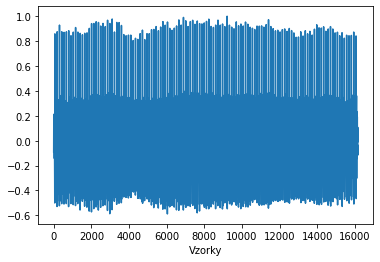

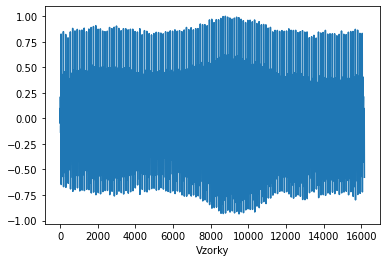

In [7]:
plt.plot(maskoff_tone)
plt.xlabel("Vzorky")
plt.show()
plt.plot(maskon_tone)
plt.xlabel("Vzorky")
plt.show()

1s = 16000 vzorkov  
10ms (0.01s) = 160 vzorkov  
20ms (0.02s) = 320 vzorkov 

In [8]:
mofft_frames = []
mont_frames = []
frame_length = 320
offset_diff = 160
offset = 0

for i in range(100):
    mofft_frames.append(maskoff_tone[offset:offset + frame_length])
    mont_frames.append(maskon_tone[offset:offset + frame_length])
    offset += offset_diff

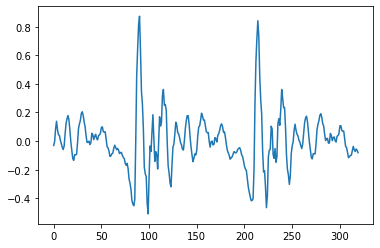

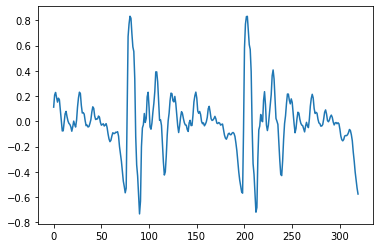

In [9]:
plt.figure()
plt.plot(mofft_frames[99])
plt.savefig("maskofftone_frame.pdf")
plt.show()
plt.figure()
plt.plot(mont_frames[99])
plt.savefig("maskontone_frame.pdf")
plt.show()

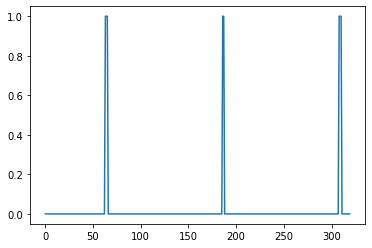

In [10]:
mofft_clipped = []
threshold = 0.7 * np.abs(maskoff_tone).max()

for frame in mofft_frames:
    tmp_frame_arr = []
    for sample in frame:
        if sample >= threshold:
            tmp_frame_arr.append(1)
        elif sample <= -threshold:
            tmp_frame_arr.append(-1)
        else:
            tmp_frame_arr.append(0)
    mofft_clipped.append(tmp_frame_arr)

mont_clipped = []
threshold = 0.7 * np.abs(maskon_tone).max()

for frame in mont_frames:
    tmp_frame_arr = []
    for sample in frame:
        if sample >= threshold:
            tmp_frame_arr.append(1)
        elif sample <= -threshold:
            tmp_frame_arr.append(-1)
        else:
            tmp_frame_arr.append(0)
    mont_clipped.append(tmp_frame_arr)

plt.plot(mofft_clipped[0])
plt.show()



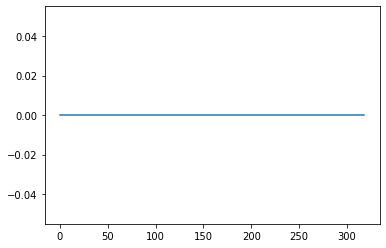

In [11]:
frame = mofft_clipped[0]
coeff_arr = []

for tau in range(len(frame) - 1):
    coeff = 0
    for t in range(len(frame) - 1 - tau):
        coeff += frame[t]*frame[(t + tau) % len(frame)]
    coeff_arr.append(coeff)

plt.plot(coeff_arr)
plt.show()